In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib import cm as CM

import os
import numpy as np
from scipy.io import loadmat
from PIL import Image; import cv2
import torch
from torchvision import transforms
from models import M_SFANet

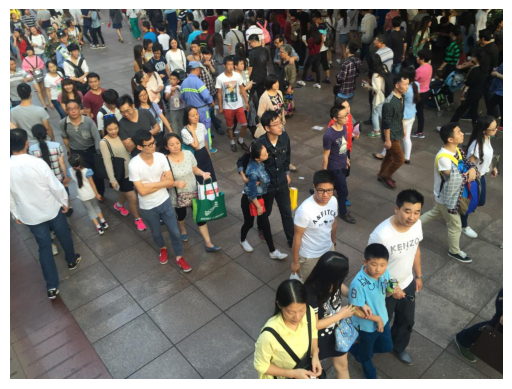

In [2]:
part = 'B'; index = 4
DATA_PATH = f"./ShanghaiTech_Crowd_Counting_Dataset/part_{part}_final/test_data/"
fname = os.path.join(DATA_PATH, "ground_truth", f"GT_IMG_{index}.mat")
img = Image.open(os.path.join(DATA_PATH, "images", f"IMG_{index}.jpg")).convert('RGB')
plt.imshow(img)
plt.gca().set_axis_off()
plt.show()

In [3]:
gt = loadmat(fname)["image_info"]
location = gt[0, 0][0, 0][0]
count = location.shape[0]
print(fname)
print('label:', count)

./ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/ground_truth/GT_IMG_4.mat
label: 95


In [4]:
model = M_SFANet.Model()
model.load_state_dict(torch.load(f"./ShanghaitechWeights/checkpoint_best_MSFANet_{part}.pth", 
                                 map_location=torch.device('cpu'))["model"]);

In [5]:
trans = transforms.Compose([transforms.ToTensor(), 
                            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                           ])

In [6]:
height, width = img.size[1], img.size[0]
height = round(height / 16) * 16
width = round(width / 16) * 16
img = cv2.resize(np.array(img), (width,height), Image.BILINEAR)
img = trans(Image.fromarray(img))[None, :]

In [7]:
model.eval()
density_map, attention_map = model(img)
print('Estimated count:', torch.sum(density_map).item())

Estimated count: 94.73706817626953


Visualize estimated density map


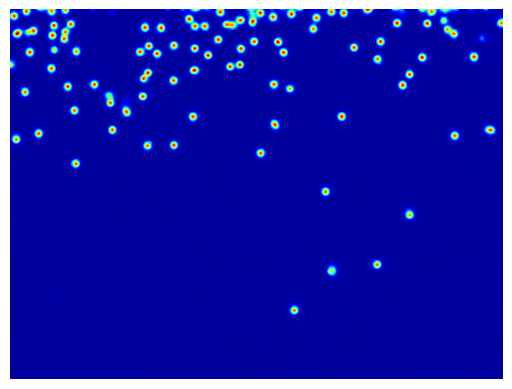

In [8]:
print("Visualize estimated density map")
plt.gca().set_axis_off()
plt.margins(0, 0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.imshow(density_map[0][0].detach().numpy(), cmap = CM.jet)
# plt.savefig(fname=..., dpi=300)
plt.show()